In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


El valor para chi^2 es  331.3823431835334
El valor para chi^2 por grado de libertad es:  41.422792897941676
El valor de los parámetros c_i son  [1.15330303 0.07847567]


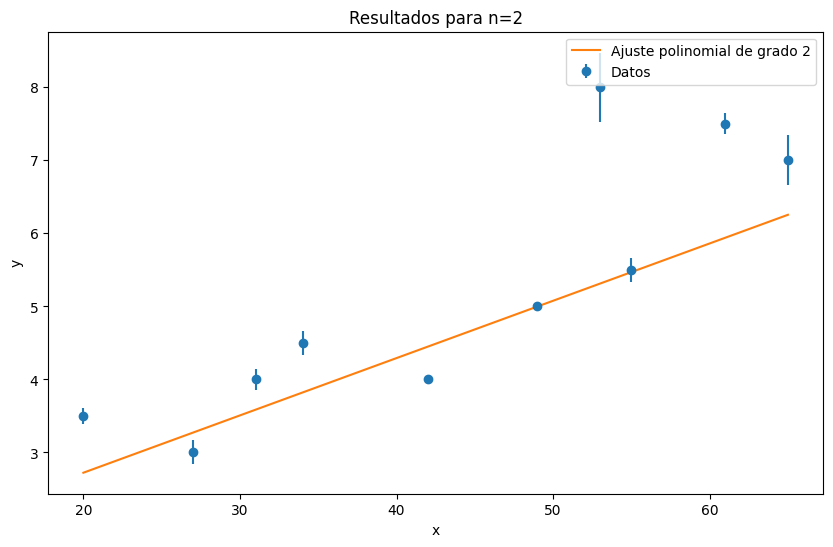


El valor para chi^2 es  112.66057700618822
El valor para chi^2 por grado de libertad es:  16.094368143741175
El valor de los parámetros c_i son  [ 5.80450311e+00 -1.75397670e-01  3.22731789e-03]


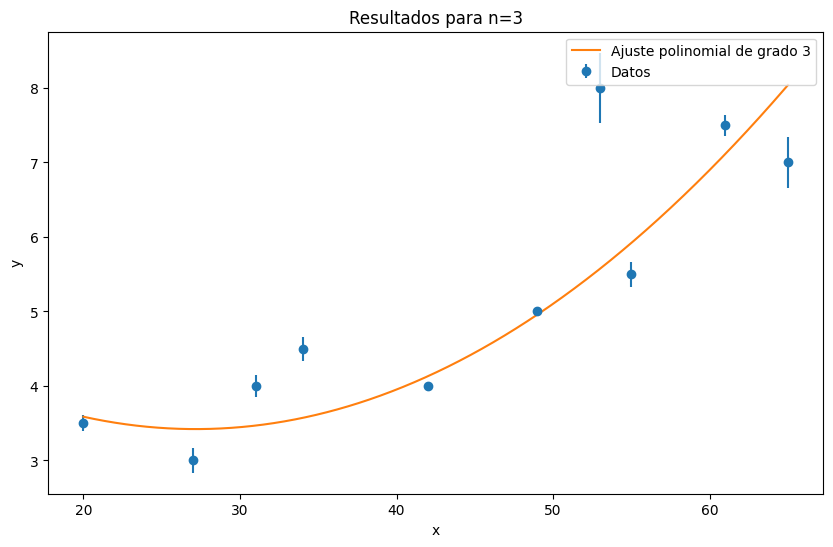

([array([1.15330303, 0.07847567]),
  array([ 5.80450311e+00, -1.75397670e-01,  3.22731789e-03])],
 [array([0.13556058, 0.00310295]),
  array([3.42470698e-01, 1.74442703e-02, 2.18220599e-04])],
 [array([[ 1.83766712e-02, -4.10009829e-04],
         [-4.10009829e-04,  9.62831203e-06]]),
  array([[ 1.17286179e-01, -5.80872130e-03,  6.86301208e-05],
         [-5.80872130e-03,  3.04302568e-04, -3.74599196e-06],
         [ 6.86301208e-05, -3.74599196e-06,  4.76202298e-08]])])

In [53]:
def phi(n,k,x):
    if n==2:
        val = x**k
    elif n==3:
        val = x**k
    return val

def normalfit(dataxs,datays,datasigs,n):
    N = dataxs.size
    A = np.zeros((N,n))
    for k in range(n):
        A[:,k] = phi(n,k,dataxs)/datasigs
    bs = datays/datasigs
    matI = A.T@A
    InvmatI = np.linalg.inv(matI)
    matD = A.T@bs
    cs = InvmatI@matD
    
    sigS = np.diagonal(InvmatI)
    chisq = np.sum((bs - A@cs)**2)
    return cs, chisq, sigS, InvmatI


def plotresults(dataxs, datays, datasigs, cs, n):
    x = np.linspace(min(dataxs), max(dataxs), 1000)
    y = sum(c*x**i for i, c in enumerate(cs))

    plt.figure(figsize=(10,6))
    plt.errorbar(dataxs, datays, yerr=datasigs, fmt='o', label='Datos')
    plt.plot(x, y, label=f'Ajuste polinomial de grado {n}')
    plt.title(f'Resultados para n={n}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

def ajuste_polinomial(dataxs, datays):
    N = dataxs.size
    datasigs = 0.2 * np.abs(np.random.randn(N))
    
    csVal, sigVal, sigData = [], [], []
    
    for n in (2, 3):
        cs, chisq, sigS, sigD = normalfit(dataxs,datays,datasigs,n)
        csVal.append(cs)
        sigVal.append(np.sqrt(sigS))
        sigData.append(sigD) 
        print()
        print('El valor para chi^2 es ', chisq)
        print('El valor para chi^2 por grado de libertad es: ', chisq/(dataxs.size - cs.size))
        print('El valor de los parámetros c_i son ', cs)
        plotresults(dataxs, datays, datasigs, cs, n)
    return csVal, sigVal, sigData
# Datos
dataxs = np.array([34, 27, 65, 20, 53, 49, 42, 31, 55, 61])
datays = np.array([4.5, 3, 7, 3.5, 8, 5, 4, 4, 5.5, 7.5])

ajuste_polinomial(dataxs, datays)

¿Cuál es el mejor? Para saber esto se debe multiplicar el resultado de chii cuadrada por los grados de libertad de cada programa, el resultado que sea más cercano a 1 es el mejor. Por lo que el ajuste del monomio ha sido el mejor modelo. 

c) ¿Qué puntuación sobre la inseguridad en el barrio obtendría un individuo de 25 años? ¿Y de 70 años?

In [54]:
modelo1 = lambda x, c0, c1: c0 + c1*x
print("Percepción de inseguridad para persona de 25 años: ", modelo1(25, *csVal[0]))
print("Percepción de inseguridad para persona de 70 años: ", modelo1(70, *csVal[0]))

IndexError: list index out of range

Estudiar la correlación de las variables e interpretar los coeficientes usando el coeficiente de correlación de Pearson

Coef. de correlación de Pearson: 0.86


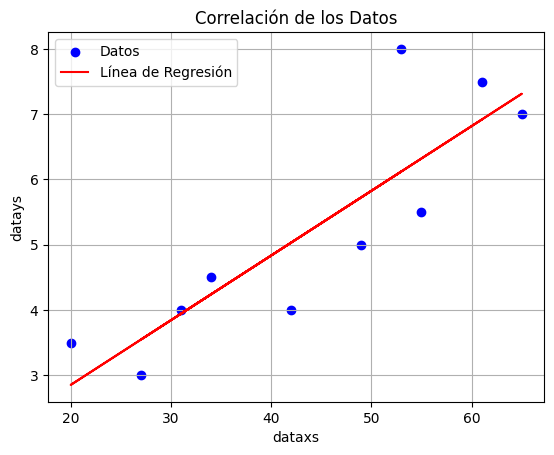

In [21]:
# se calcula el coeficiente de pearson con una función de scipy
dataxs = np.array([34, 27, 65, 20, 53, 49, 42, 31, 55, 61])
datays = np.array([4.5, 3, 7, 3.5, 8, 5, 4, 4, 5.5, 7.5])

# Calcular el coeficiente de correlación de Pearson
coefc, _ = pearsonr(dataxs, datays)

print( f'Coef. de correlación de Pearson: {coefc:.2f}')

# Crear la gráfica de dispersión
plt.scatter(dataxs, datays, color='blue', label='Datos')
plt.title('Correlación de los Datos')
plt.xlabel('dataxs')
plt.ylabel('datays')

# Añadir una línea de regresión
slope, intercept = np.polyfit(dataxs, datays, 1)
plt.plot(dataxs, slope * dataxs + intercept, color='red', label='Línea de Regresión')
plt.legend()
plt.grid(True)
plt.show()

¿Qué valor de la edad presenta mayor residuo? ¿Cuál es residuo para la edad de 42 años? ¿Y para la edad de 31?

In [28]:
def residuo():
    dataxs = np.array([34, 27, 65, 20, 53, 49, 42, 31, 55, 61])
    datays = np.array([4.5, 3, 7, 3.5, 8, 5, 4, 4, 5.5, 7.5])

    # Definir la función modelo2
    modelo2 = lambda x, c0, c1, c2: c0 + c1 * x + c2 * x ** 2

    csVal = [[1.0, 0.1]]  

    # Iterar a través de los datos y aplicar modelo2
    for x, y_real in zip(dataxs, datays):
        y_pred = modelo2(x, *csVal[0], 0)  # c0 y c1 desde csVal[0], y c2 = 0
        residuo = y_real - y_pred
        print(f"Para x = {x}, el residuo es: {residuo}")

# Llamar a la función para ejecutar el cálculo de valores predichos
residuo()

Para x = 34, el residuo es: 0.09999999999999964
Para x = 27, el residuo es: -0.7000000000000002
Para x = 65, el residuo es: -0.5
Para x = 20, el residuo es: 0.5
Para x = 53, el residuo es: 1.6999999999999993
Para x = 49, el residuo es: -0.9000000000000004
Para x = 42, el residuo es: -1.2000000000000002
Para x = 31, el residuo es: -0.09999999999999964
Para x = 55, el residuo es: -1.0
Para x = 61, el residuo es: 0.39999999999999947


El valor que presenta un mayor residuo es para el individuo con 53 años, el residuo para el individuoo con 42 años es -1.20 y para el de 31 es -0.09.


El valor para chi^2 es  10424.306068372984
El valor para chi^2 por grado de libertad es:  1158.2562298192204
El valor de los parámetros c_i son  [3.08109942 0.02226639]


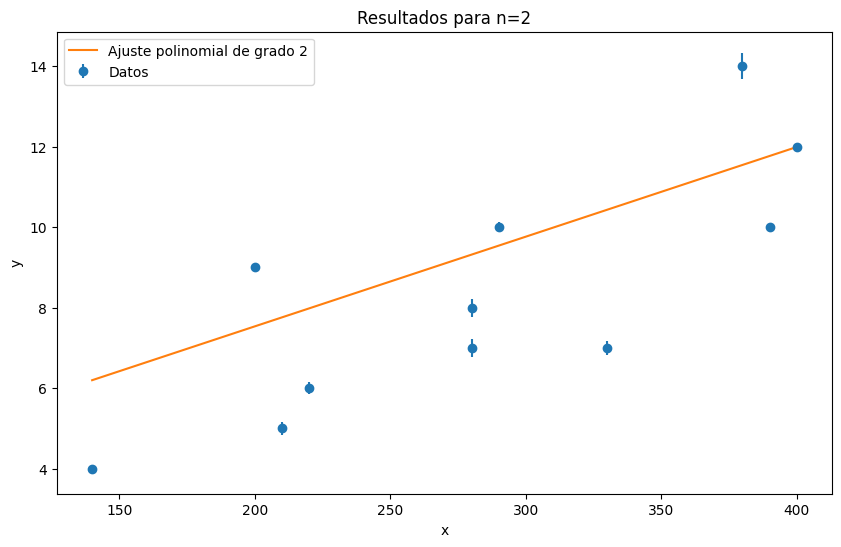


El valor para chi^2 es  9461.848121362757
El valor para chi^2 por grado de libertad es:  1182.7310151703446
El valor de los parámetros c_i son  [ 1.42212320e+01 -6.29984025e-02  1.43551453e-04]


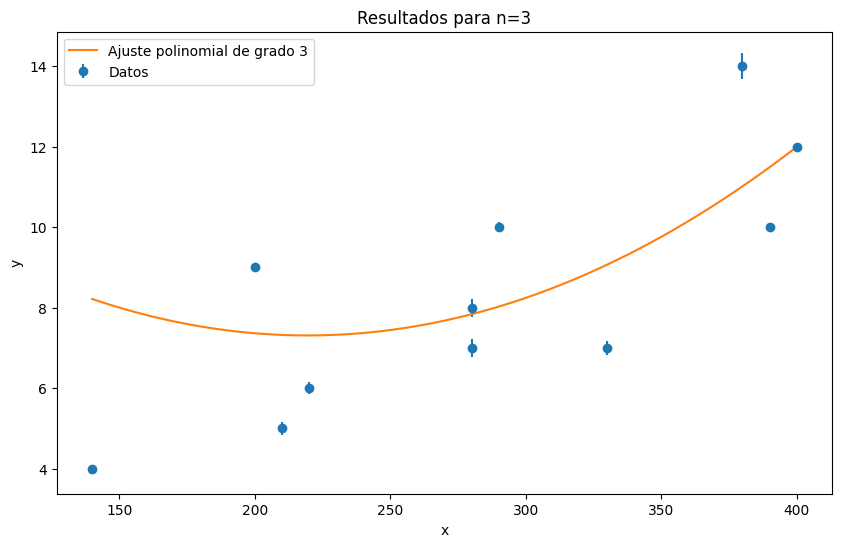

([array([3.08109942, 0.02226639]),
  array([ 1.42212320e+01, -6.29984025e-02,  1.43551453e-04])],
 [array([0.07107413, 0.00017787]),
  array([3.66053118e-01, 2.75414290e-03, 4.62718338e-06])],
 [array([[ 5.05153156e-03, -1.26383621e-05],
         [-1.26383621e-05,  3.16381003e-08]]),
  array([[ 1.33994885e-01, -9.99550159e-04,  1.66156062e-06],
         [-9.99550159e-04,  7.58530310e-06, -1.27173192e-08],
         [ 1.66156062e-06, -1.27173192e-08,  2.14108260e-11]])])

In [58]:
dataxs1 = np.array([200, 220, 400, 330, 210, 390, 280, 140, 280, 290, 380])
datays1 = np.array([9, 6, 12, 7, 5, 10, 8, 4, 7, 10, 14])
# Llamada a la función de ajuste con los nuevos datos
ajuste_polinomial(dataxs1, datays1)

b) ¿Cuál es el mejor modelo?

Checando en ambos resultados la respuesta a cuánto es chi^2 por grados de libertad el más cercano a 1 es el polinomio.

c) ¿Existe una correlación entre los datos?
El coeficiente de correlación lineal de Pearson indica que si r = 0 entonces no hay correlación entre los datos dados.

El coeficiente de correlación de Pearson r=0.801 no es cercano a cero.


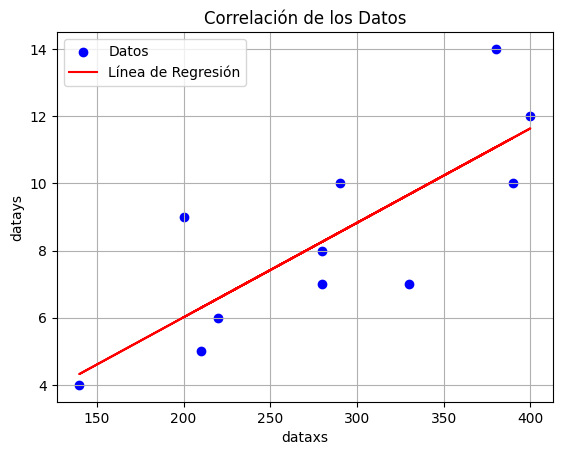

In [57]:
# código
dataxs1 = np.array([200, 220, 400, 330, 210, 390, 280, 140, 280, 290, 380])
datays1 = np.array([9, 6, 12, 7, 5, 10, 8, 4, 7, 10, 14])

# Calcular el coeficiente de correlación de Pearson
coefc, _ = pearsonr(dataxs1, datays1)

umbral = 0.1

if abs(coefc) < umbral:
    print(f"El coeficiente de correlación de Pearson r={coefc:.3f} es cercano a cero.")
else:
    print(f"El coeficiente de correlación de Pearson r={coefc:.3f} no es cercano a cero.")

# Crear la gráfica de dispersión
plt.scatter(dataxs1, datays1, color='blue', label='Datos')
plt.title('Correlación de los Datos')
plt.xlabel('dataxs')
plt.ylabel('datays')


slope, intercept = np.polyfit(dataxs1, datays1, 1)
plt.plot(dataxs1, slope * dataxs1 + intercept, color='red', label='Línea de Regresión')
plt.legend()
plt.grid(True)
plt.show()

Se concluye que sí hay correlación en los datos.

Ejercicio 3:
Hallar la recta y = c0 + c1*x que relaciona el consumo de alcohol con (x) con el consumo de otros estupefacientes (y) para esa población de jóvenes. 

Coeficientes: c0=-0.2612712975098295, c1=2.245085190039318


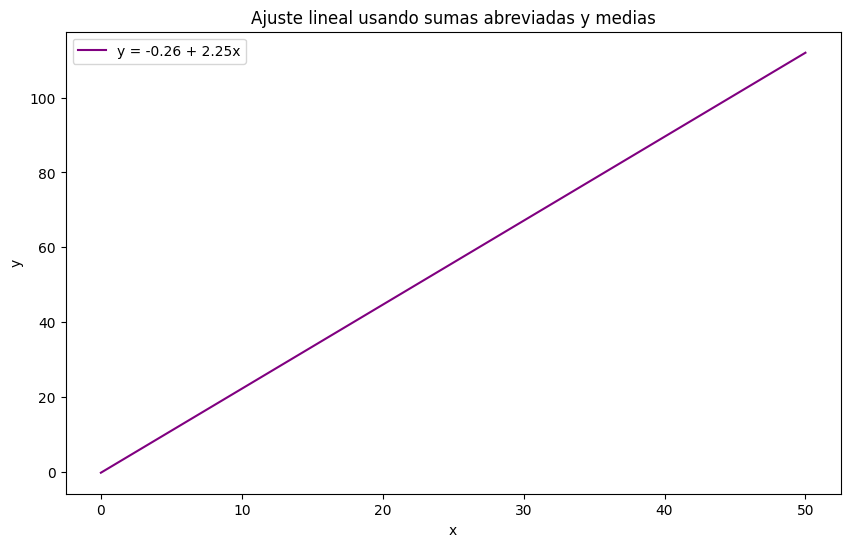

In [74]:
# Realizando código de fit de línea recta para después sustituir estos valores y encontrar la ecuación.
# Sumas abreviadas y medias
Sx = 2.5
Sy = 3
Sxx = 2.5325
Sxy = 5.0325
N = 10  # Número de puntos de datos
x_mean = 2.3
y_mean = 1.3

def funcionesSAbrev(Sx, Sy, Sxx, Sxy, N):
    Sf = N
    Sxf = Sx
    Syf = Sy
    Sxxf = Sxx
    Sxyf = Sxy
    Triangf = Sf * Sxxf - Sxf**2
    return Sf, Sxf, Syf, Sxxf, Sxyf, Triangf

def computecs(Sx, Sy, Sxx, Sxy, N):
    Sf, Sxf, Syf, Sxxf, Sxyf, Triangf = funcionesSAbrev(Sx, Sy, Sxx, Sxy, N)
    
    cs = np.zeros(2)  # Coeficientes de mejor ajuste
    sigcs = ([2.5, 3])  # Desviaciones estándar
    
    cs[0] = (Sxxf * Syf - Sxf * Sxyf) / Triangf
    cs[1] = (Sf * Sxyf - Sxf * Syf) / Triangf
    sigcs[0] = np.sqrt(Sxxf / Triangf)
    sigcs[1] = np.sqrt(Sf / Triangf)
    return cs, sigcs

datasigs = 3 * np.abs(np.random.randn(N))

# Calcular coeficientes
cs, sigcs = computecs(Sx, Sy, Sxx, Sxy, N)

print(f'Coeficientes: c0={cs[0]}, c1={cs[1]}')

# Graficar resultados 
x = np.linspace(0, 50, 100)
y = cs[0] + cs[1] * x

plt.figure(figsize=(10, 6))
plt.plot(x, y, color = 'purple', label=f'y = {cs[0]:.2f} + {cs[1]:.2f}x')
plt.title('Ajuste lineal usando sumas abreviadas y medias')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()